

---

```
CISC 3440: Machine Learning
P2 (35 Points)
Due: Nov 24th, 11:59 pm
```
---
**Submission Instructions**


* You are expected to complete this project on your own (not with a partner).
* Please refer to the syllabus for the late submission policy.
* You must submit your assignment via Blackboard.
* Your code should work without errors; code that fails will not be graded.


We will work with the Kaggle Dataset (https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024) for this project. The dataset involves predicting if a nearest object to earth is Hazardous.

The project will involve two parts:
1. In the first part you will implement the Perceptron Algorithm and Train the model using the data
2. In the second part you will use Linear Regression to build a model for the same


You are provided with one file train.csv. You are also provided with some started code to read files and process them. You will use Pandas to load and process the feature. ***Please work with the Pandas and Regression tutorials before you start with the project.***

**Data Features:** Each line in the file has the following Features

| **Column Name**             | **Description**                                                                 |
|-----------------------------|---------------------------------------------------------------------------------|
| `absolute_magnitude`        | The absolute magnitude of the object, indicating its brightness.               |
| `estimated_diameter_min`    | The minimum estimated diameter of the object, likely in kilometers or meters.  |
| `estimated_diameter_max`    | The maximum estimated diameter of the object, likely in kilometers or meters.  |
| `relative_velocity`         | The speed at which the object is moving relative to Earth, typically in m/s or km/h. |
| `miss_distance`             | The minimum distance by which the object is expected to miss Earth, possibly in kilometers. |
| `is_hazardous`              | A boolean indicator (TRUE/FALSE) of whether the object is classified as potentially hazardous to Earth. |


# Part-1 Perceptron

For the first part you will implement the Perceptron Algorithm, which you will use to train the data. You can use the implementation of the algorithm provided in your slides, **but be prepared to explain the algorithm to me in person if asked**.

**[5 points] Task-1: Perceptron Algorithm**

Complete the function definition below for training the Perceptron algorithm, the algorithm will take the following parameters as input:
- training_samples of shape (N,D) where N is the number of samples and D is the number of features
- training_labels of shape (N,1) where N is the number of samples
- iterations the number of times to iterate over the entire dataset

The function will return two lists:

- *weight_values* : A list of weight vectors obtained at the end of each iteration, this list will contain elements equivalent to the number of iterations

- *bias_values* : A list of bias values obtained at the end of each iteration, this list will also contain elements equivalent to the number of iterations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def perceptron_algorithm(training_samples, training_labels, iterations):
    print("Training Start")
    """
  Trains a Perceptron model on the provided training samples and labels for a specified number of iterations.

  Parameters
  ----------
  training_samples : numpy.ndarray
      A 2D array of shape (num_samples, num_features), where each row represents a training sample
      and each column represents a feature.

  training_labels : numpy.ndarray
      A 1D array of shape (num_samples,), where each element is the label for the corresponding
      training sample in `training_samples`.

  iterations : int
      The number of epochs (full passes through the training data) to perform.

  Returns
  -------
  weight_values : list of numpy.ndarray
      A list of numpy arrays, each representing the weights after each epoch.

  bias_values : list of float
      A list of bias values after each epoch.

  Notes
  -----
  - You should initialize the weight and bias values randomly.
  """
    # Initalizing weight, bias arrays, and inital activation
    weight_values = []
    bias_values = []
    activation = 0

    # Initalize first bias and wieght
    num_dimensions = training_samples.shape[-1]
    bias = np.random.rand(1)
    weight = np.random.rand(num_dimensions)

    # Append intial weight and bias values
    weight_values.append(weight)
    bias_values.append(bias)
    print('START: Weight: {} | Bias: {} \n'.format(weight, bias))
    
    for iteration in range(iterations):
        updates = 0
        # print('Epoch: {}  |  Weight:{}  |  Bias: {}'.format(epoch, weight, bias))
        # For each label and sample in each pair of [training_label[label], training_sample[sample]]
        for label, sample in zip(training_labels, training_samples):
            # Matrix dot product of each sample and weight vector + bias
            activation = np.dot(sample, weight) + bias
            # Weight and bias update function if (activation * label) is less than 0
            if label * activation < 0:
                # print('\nUPDATING WEIGHT AND BIAS')
                weight = weight + (label * sample)
                bias = bias + label
                updates+=1
                        
        print(f"Epoch {iteration}: {updates} updates made")
        weight_values.append(weight.copy())
        bias_values.append(bias.copy())
    print("Training End")
    return weight_values, bias_values


## **TEST BLOCK**

In [3]:
# training_samples = np.array([[1, 2], [2, 3], [-1, -1]])
# training_labels = np.array([1, 1, -1])
# weight_values, bias_values = perceptron_algorithm(training_samples, training_labels, iterations=10)

**[2 Points] Task-2: Predictions**

Complete the function definition below. The function should take three parameters:
- test_sample: A single test sample
- w: Weight vector
- b: bias value

and return the prediction +1 or -1 depending on the acitivation value

In [4]:
def perceptron_predict(test_sample,w,b):
  """
    Predicts the class label for a given test sample using the Perceptron model.

    Parameters
    ----------
    test_sample : numpy.ndarray
        A 1D array representing the feature values of the test sample.

    w : numpy.ndarray
        A 1D array representing the weights learned by the Perceptron algorithm.

    b : float
        The bias term learned by the Perceptron algorithm.

    Returns
    -------
    int
        The predicted class label for the test sample: +1 if the sample is classified as positive,
        or -1 if classified as negative.
  """
  prediction = 0
  activation = np.dot(test_sample, w) + b # Dot product 
  
  if activation > 0:
    prediction = 1
  elif activation < 0:
    prediction = -1

  return prediction

## **TEST BLOCK**

In [5]:
# test_sample = np.array([2, 3])
# w = np.array([1, 0.5])
# b = -1
# perceptron_predict(test_sample, w, b)

### **Data Loading and Preprocessing**
You will use Pandas following the provided tutorials for Linear Regresssion to Load the data and process it. The project is exploratry and you are given freedom on how to process different features and how to handle missing data.

We will first load the data into Pandas and obtain relevant information.

In [6]:
import pandas as pd

trainData = pd.read_csv("train.csv")
print(trainData)


        absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                    26.89                0.011132                0.024891   
1                    26.30                0.014607                0.032662   
2                    23.70                0.048368                0.108153   
3                    23.45                0.054269                0.121350   
4                    22.80                0.073207                0.163697   
...                    ...                     ...                     ...   
270554               19.63                0.315177                0.704758   
270555               26.40                0.013949                0.031192   
270556               21.50                0.133216                0.297879   
270557               21.40                0.139494                0.311918   
270558               18.24                0.597799                1.336719   

        relative_velocity  miss_distance  is_hazardous  
0     

**[4 Points] Task-3: Cleaning and Preprocessing**
Answer the following questions based on the results of info():
1. Are all the feature columns numeric?

2. Does any of the feature column contain missing values?

3. Can the label format be directly used to train the Perceptron algorithm?


Based on your answer to the above questions, in the code below you will do the following:

- If you found missing values, handle them. Use the tutorial to guide you on this.

- If the label format does not allow for direct training, you can change that. ***Hint: You will find the replace method in pandas useful**

- Split the features and labels into separate dataFrames. You can refer to tutorial on how to do this.

- Store the features data frame in the variable name *features* and labels in the variable name *labels*

- You might find it useful to standardize your features, refer to the Regression tutorial for this. The standardize features should still be stored in the variable name *features*.


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

'''
   - Split the features 
   - Convert feature labels from bool to ints
   - Fit to polynomial features
   - Standarize features

'''
# Get feature names
feature_list = ["absolute_magnitude", "estimated_diameter_min","estimated_diameter_max","relative_velocity","miss_distance"]
label = "is_hazardous"

# Set X and Y to the features and labels respectively 
X = trainData[feature_list]
Y = trainData[label]

# Selecting only numerical values
X = trainData.select_dtypes(include = 'number')

'''
Data preprocessing
   X_zeros:
      - Zero values replacing 
   X_interpolate:
   `  - Missing values inerpolated by other coloumn values
'''
X_zeros = X.fillna(0) # Filling in missing data with just 0
X_interpolate = X.interpolate()

labels = Y.replace(to_replace=[True, False], value = [1, -1])  # Replacing bool values with {0,1}

# Polynomial fitting
#poly = PolynomialFeatures(degree=3, include_bias=False)
#features_zero = poly.fit_transform(X_zeros)
#features_interpolate = poly.fit_transform(X_interpolate)

# Standard deviation scaling
scaler = StandardScaler()
features_zero = scaler.fit_transform(X_zeros)
features_interpolate = scaler.fit_transform(X_interpolate)
  

C:\Users\butth\AppData\Local\Temp\ipykernel_10664\864825151.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels = Y.replace(to_replace=[True, False], value = [1, -1])  # Replacing bool values with {0,1}


**[1 point] Task-4: Training and validation sets**

The next task is to create Training and Validation sets. For this you can use the *train_test_split()* method. Retain 90% of the data for training and 10% for testing.

The perceptron algorithm will take numpy arrays as input so you might want to convert your split data into numpy arrays using if the resulting arrays after the split are not numpy arrays.

> df.to_numpy()

where df is your data frame.

By the end of this, you should have four variables :

- train_features_numpy - Numpy array of dimension NxD where N is the number of    samples
- train_labels_numpy - Numpy array of dimension Nx1
- val_features_numpy - Numpy array of dimension MxD where M is the number of samples
- val_labels_numpy - Numpy array of dimension Mx1

In [8]:
from sklearn.model_selection import train_test_split

train_features_numpy = None
val_features_numpy = None
train_labels_numpy = None
val_labels_numpy = None

train_features_numpy, val_features_numpy, train_labels_numpy, val_labels_numpy = train_test_split(features_zero, labels, test_size=0.1, random_state=42)
    


print("Training features: ", train_features_numpy, "\n")
print("Validation features: ", val_features_numpy, "\n")
print("Training labels: ", train_labels_numpy, "\n")
print("Validation labels: ", val_labels_numpy, "\n")

Training features:  [[ 1.73679705 -0.47303558 -0.47303558 -1.45222095 -1.35492005]
 [ 0.66871849 -0.40623676 -0.40623676 -0.95078133 -1.65609396]
 [ 0.50439871 -0.38455949 -0.38455949 -0.92228045 -1.3388152 ]
 ...
 [-0.51917658 -0.06071745 -0.06071745 -0.16779893 -0.26513654]
 [ 0.91177483 -0.43067504 -0.43067504 -0.8477396   0.4641225 ]
 [-0.6766497   0.04148211  0.04148211 -1.06682777 -0.94442501]] 

Validation features:  [[ 0.60025192 -0.39778274 -0.39778274  0.1365927  -1.16252364]
 [ 0.87411821 -0.42739168 -0.42739168 -0.78724188 -0.40203372]
 [ 1.26095436 -0.45435958 -0.45435958 -0.70329964 -0.46324684]
 ...
 [ 1.39446418 -0.46085381 -0.46085381 -0.26189656  0.6408856 ]
 [ 0.23737907 -0.33731987 -0.33731987 -1.46693945  0.36727494]
 [ 1.90454016 -0.47724281 -0.47724281 -1.09669501  0.17698067]] 

Training labels:  176473   -1
251945   -1
60609    -1
108193   -1
220177   -1
         ..
119879   -1
259178   -1
131932   -1
146867   -1
121958    1
Name: is_hazardous, Length: 243503, 

**[2 points] Task-5: Training and validation**

You will train the model for 50-100 iterations, you are free to chose the number of iterations. Once trained you will use the returned weights and bias values to make predictions on the validation data and compute accuracy and F1-score for the weights and bias values from every iteration.

For computing accuracy and f1_score you can use sklearn library. Please refer to the official documentation.

- Computing accuracy using sklearn - refer [here](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

- Computing F1-score using sklearn - refere [here](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

The accuracy value should be stored in the variable name *accuracy_over_iterations* and F1-score in the variable name *f1_score_over_iterations*. These values will be used to generate plot which for now uses randomly generate accuracy and F1-scores for 100 iterations.

In [9]:
iterations = 50 # Set value
weights, bias = perceptron_algorithm(train_features_numpy, train_labels_numpy, iterations)



Training Start
START: Weight: [0.27546595 0.81430293 0.87247162 0.30926465 0.48608317] | Bias: [0.62493829] 

Epoch 0: 43612 updates made
Epoch 1: 43580 updates made
Epoch 2: 43610 updates made
Epoch 3: 43612 updates made
Epoch 4: 43791 updates made
Epoch 5: 43659 updates made
Epoch 6: 43541 updates made
Epoch 7: 43532 updates made
Epoch 8: 43491 updates made
Epoch 9: 43514 updates made
Epoch 10: 43513 updates made
Epoch 11: 43568 updates made
Epoch 12: 43655 updates made
Epoch 13: 43545 updates made
Epoch 14: 43462 updates made
Epoch 15: 43625 updates made
Epoch 16: 43614 updates made
Epoch 17: 43751 updates made
Epoch 18: 43705 updates made
Epoch 19: 43524 updates made
Epoch 20: 43536 updates made
Epoch 21: 43636 updates made
Epoch 22: 43530 updates made
Epoch 23: 43588 updates made
Epoch 24: 43572 updates made
Epoch 25: 43463 updates made
Epoch 26: 43604 updates made
Epoch 27: 43607 updates made
Epoch 28: 43556 updates made
Epoch 29: 43588 updates made
Epoch 30: 43411 updates made
E

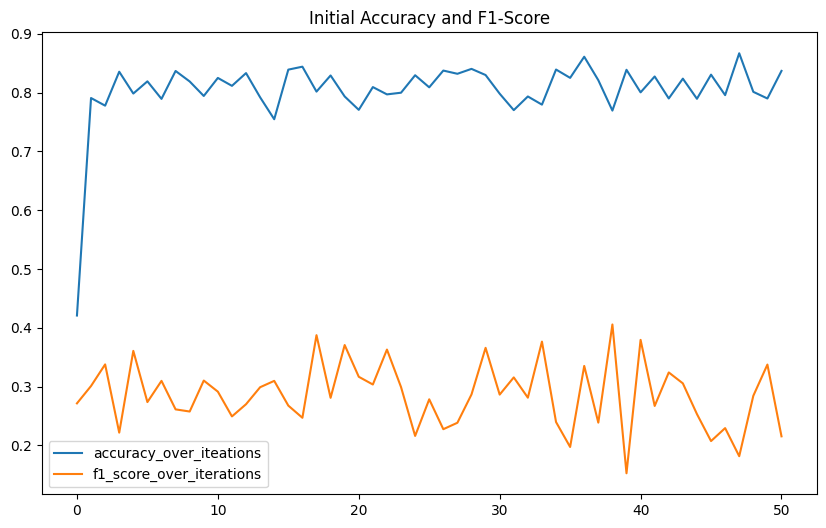

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,accuracy_score

# Initalize var's
accuracy_over_iteations = [] # Storing all accuracy score for each iteration
f1_score_over_iteations = [] # Storing all f1 score for each iteration

# Get all of the predictions with each weight
for i in range(len(weights)):
    validation_predictions = [] # Storing all validation predictions from precepton predict with the weight values
    for sample in val_features_numpy:
        validation_predictions.append(perceptron_predict(sample, weights[i], bias[i]))
    accuracy_over_iteations.append(accuracy_score(val_labels_numpy, validation_predictions)) # Compute accuracy
    f1_score_over_iteations.append(f1_score(val_labels_numpy, validation_predictions)) # Compute F1 Score

plt.figure(figsize=(10, 6))
plt.plot(accuracy_over_iteations, label='accuracy_over_iteations')
plt.plot(f1_score_over_iteations, label='f1_score_over_iterations')
plt.title("Initial Accuracy and F1-Score")
plt.legend()
plt.show()

**[1 Point] Task-6:** Based on the plots generated above answer the following questions:

4. Is there a difference in accuracy and F1-score values generated over different iterations?

5. What is possible reason behind the observed difference between accuracy and F1-score if any?

**[6 Points] Task-7: Balancing the Dataset**

The distribution of +1 and -1 samples are imbalanced in the dataset. As we saw in Lecture 5, there are different ways to address it

- Undersample
- Oversample

The code below shows how to undersample it and stores the resulting data into the variable *df_balanced*. You will generate df_balanced to generate new features and labels and repeat the training process. If you want you can also try to oversample and understand its impact on training.




In [11]:
from sklearn.preprocessing import StandardScaler
feature_list = ["absolute_magnitude", "estimated_diameter_min","estimated_diameter_max","relative_velocity","miss_distance"]
label = "is_hazardous"

majority_class = trainData[trainData['is_hazardous'] == False]
minority_class = trainData[trainData['is_hazardous'] == True]
majority_downsampled = majority_class.sample(n=len(minority_class), random_state=42)
df_balanced = pd.concat([majority_downsampled, minority_class])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.info()

balanced_features = df_balanced[feature_list]
balanced_labels = df_balanced[label]

balanced_features_zeros = balanced_features.fillna(0) # Filling in missing data with just 0
scaler = StandardScaler()
df_features_zero = scaler.fit_transform(balanced_features_zeros)
df_labels = balanced_labels.replace(to_replace=[True, False], value = [1, -1])  # Replacing bool values with {0,1}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68992 entries, 0 to 68991
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   absolute_magnitude      68990 non-null  float64
 1   estimated_diameter_min  68990 non-null  float64
 2   estimated_diameter_max  68990 non-null  float64
 3   relative_velocity       68992 non-null  float64
 4   miss_distance           68992 non-null  float64
 5   is_hazardous            68992 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 2.7 MB


C:\Users\butth\AppData\Local\Temp\ipykernel_10664\225207453.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_labels = balanced_labels.replace(to_replace=[True, False], value = [1, -1])  # Replacing bool values with {0,1}


In [12]:
iterations=50
w,b=perceptron_algorithm(df_features_zero,df_labels,iterations)

Training Start
START: Weight: [0.39063132 0.10261667 0.60385454 0.00098775 0.42243897] | Bias: [0.06586739] 

Epoch 0: 19666 updates made
Epoch 1: 19725 updates made
Epoch 2: 19774 updates made
Epoch 3: 19610 updates made
Epoch 4: 19743 updates made
Epoch 5: 19665 updates made
Epoch 6: 19714 updates made
Epoch 7: 19768 updates made
Epoch 8: 19825 updates made
Epoch 9: 19724 updates made
Epoch 10: 19746 updates made
Epoch 11: 19658 updates made
Epoch 12: 19636 updates made
Epoch 13: 19612 updates made
Epoch 14: 19788 updates made
Epoch 15: 19736 updates made
Epoch 16: 19622 updates made
Epoch 17: 19641 updates made
Epoch 18: 19736 updates made
Epoch 19: 19644 updates made
Epoch 20: 19717 updates made
Epoch 21: 19741 updates made
Epoch 22: 19653 updates made
Epoch 23: 19730 updates made
Epoch 24: 19682 updates made
Epoch 25: 19604 updates made
Epoch 26: 19646 updates made
Epoch 27: 19786 updates made
Epoch 28: 19819 updates made
Epoch 29: 19781 updates made
Epoch 30: 19743 updates made
E

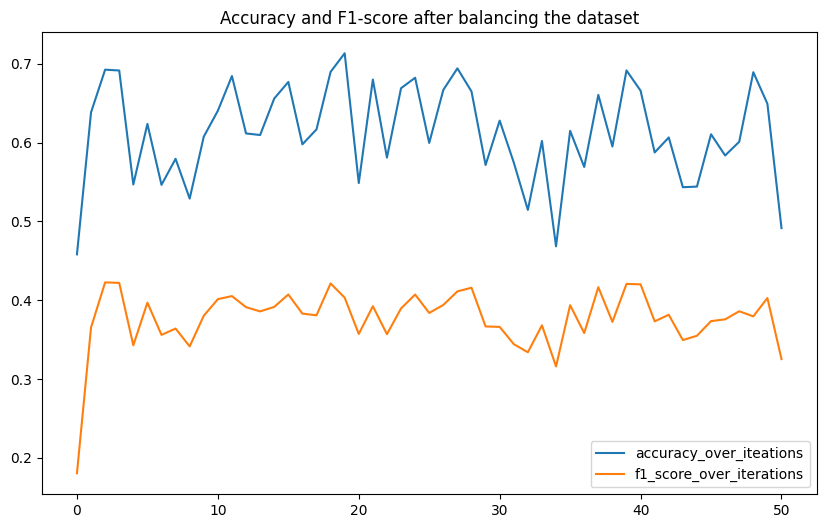

In [13]:
from sklearn.metrics import f1_score,accuracy_score

# Initalize var's
accuracy_over_iteations = [] # Storing all accuracy score for each iteration
f1_score_over_iteations = [] # Storing all f1 score for each iteration

# Get all of the predictions with each weight
for i in range(len(w)):
    validation_predictions = [] # Storing all validation predictions from precepton predict with the weight values
    for sample in val_features_numpy:
        validation_predictions.append(perceptron_predict(sample, w[i], b[i]))
    accuracy_over_iteations.append(accuracy_score(val_labels_numpy, validation_predictions)) # Compute accuracy
    f1_score_over_iteations.append(f1_score(val_labels_numpy, validation_predictions)) # Compute F1 Score

plt.figure(figsize=(10, 6))
plt.plot(accuracy_over_iteations,label='accuracy_over_iteations')
plt.plot(f1_score_over_iteations,label='f1_score_over_iterations')
plt.title("Accuracy and F1-score after balancing the dataset")
plt.legend()
plt.show()

**[2 points] Task-8**

5) Is there a difference between the plots generated before balancing and after balancing?

You will now pick an iteration based on the above plot. The weight values corresponding to that will be used to evaluate your trained model on test set.

In [14]:
import pickle
chosen_iteration=50

if chosen_iteration is not None:
  weight=w[chosen_iteration]
  bias=b[chosen_iteration]
  model=[weight,bias]
  with open('perceptron_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Part-II Linear Regression

**[12 points] Task-9:**

For this task, you will use the same balanced dataset df_balanced that you previously created and fit a linear regression model. You can closely follow the Linear Regression Tutorial for this. You have to make the following decisions:
- Should you increase the number of features using different basis functions?
- Should you use normal least squares or ridge regression? If you want to try ridget regression what *alpha* values should you try?

Once you have made the decisions, you can fit a model. You will use the same 90-10 split for training and validation. For predictions, as regression will output continous floating point values, we will interepret the class based on the following condition:
  > If the prediction is > 0 you will label it as +1
  > If the prediction is < 0 you will label it as -1

You will use the predictions of the validation set mapped to +1 and -1 to compute tha accuracy and F1_score. The final model that you select will be saved to a pickle file which will be used to evaluate your model.

***Note: This part of the project is left open ended for your to explore different methods. Feel free to add more the suggestions made and explain that as part of your submission**



Mean Squared Error: 0.1379555109886907


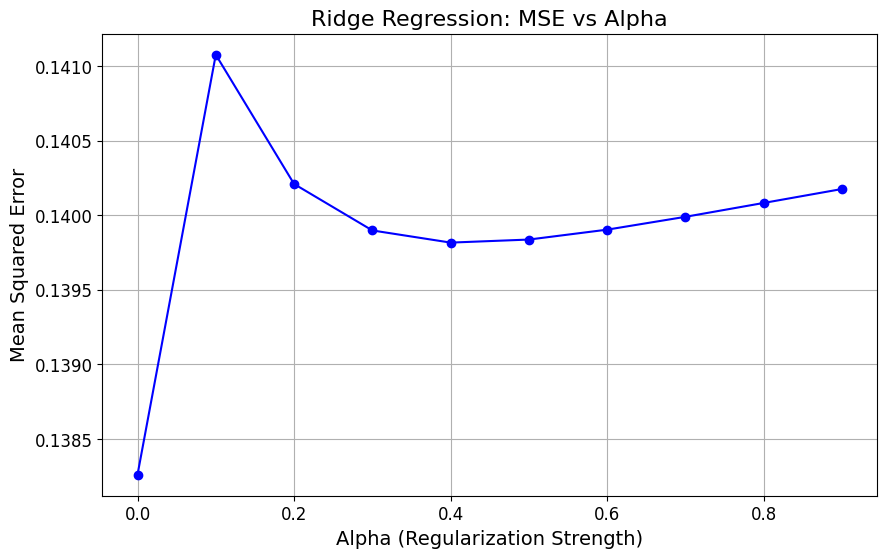

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

poly = PolynomialFeatures(degree=3, include_bias=False)
pol_df_features_zero = poly.fit_transform(df_features_zero)

# Linear Regression without regularization
LR_mse_values = []
LR_features_train, LR_features_val, LR_labels_train, LR_labels_val = train_test_split(pol_df_features_zero, balanced_labels, test_size=0.1, random_state=42)
LR_model = LinearRegression()
LR_model.fit(LR_features_train, LR_labels_train)
LR_pred = LR_model.predict(LR_features_val)
mse = mean_squared_error(LR_labels_val, LR_pred)
LR_mse_values.append(mse)
print("Mean Squared Error: {}".format(mse) )

# Ridge Regression
alphas = np.arange(0, 1, 0.1)
R_mse_values = []

for alpha in alphas:
    R_model = Ridge(alpha=alpha)
    R_model.fit(LR_features_train, LR_labels_train)
    R_y_pred = R_model.predict(LR_features_val)
    mse = mean_squared_error(LR_labels_val, R_y_pred)
    R_mse_values.append(mse)


# Plotting the MSE values for each alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, R_mse_values, marker='o', color='b', linestyle='-')
plt.xlabel('Alpha (Regularization Strength)', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Ridge Regression: MSE vs Alpha', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [17]:
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(LR_model, file)

**Submission Instructions**


- Your submission should include four files, please use your lastname in the place holder.

  - If your last name is Doe then the file for answers will be answers_Doe.txt:
Written answers, the file should be named answers_(lastname).txt
  - The ipynb file, the file should be name P2_(lastname).ipynb
  - The Perceptron model pickle file perceptron_model_(lastname).pkl
  - The Regression model pickle file linear_regression_model_(lastname).pkl

- Please add comments to the code in appropriate places

###Start Early, Good Luck!